In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Ademola\Desktop\projects\p5\loan_approval_dataset.csv")
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


## Checking for the shape of data frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


## DataFrame Description

In [4]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Data cleaning

### Checking for duplicate

In [5]:
df.duplicated(keep=False).sum()

0

## Convert values in a column to absolute value

In [6]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()

# count if there are negative values left
(df[' residential_assets_value'] < 0 ).sum()

0

## Removing white spaces in column name and all values

In [7]:
# remove white spaces from column names
df.columns = df.columns.str.strip()

# remove white spaces from values in the dataframe
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\Ademola\AppData\Local\Temp\ipykernel_2384\4030828602.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


df.describe()

## Addition of new columns

### Adding of the CIBIL RATING column

In [9]:
# Adding CIBIL RATING column with values (Poor, Average, Good and Excellent)

def cibil_rating(value):
    if 300 <= value <=549:
        return 'Poor'
    elif 550 <= value <=649:
        return 'Average'
    elif 650 <= value <=749:
        return 'Good'  
    elif 750 <= value <=900:
        return 'Excellent'
    else:
         return 'Error'

df['CIBIL RATINGS'] = df['cibil_score'].apply(cibil_rating)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL RATINGS
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor


## Addition of income levels column

In [10]:
# Grouping customers according to incomes

def income_levels (value):
    if 100000 <= value <= 1000000:
       return 'Low'
    elif 1000001 <= value <= 4000000:
       return 'Low-Middle'
    elif 4000001 <= value <= 7500000:
       return 'Upper-Middle'
    elif 7500001 <= value <= 10000000:
       return 'High'
    else:
       return 'Very High Income'
        
df['Income Levels'] = df['income_annum'].apply(income_levels)

df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL RATINGS,Income Levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High


## Adding of loan rating column

In [11]:
# Grouping loan amount as Bronze, Silver, Gold and Platinum

def loan_rating (value):
    if 100000 <= value <= 10000000:
        return 'Bronze'
    elif 10000001 <= value <= 20000000:
        return 'Silver'
    elif 20000001 <= value <= 30000000:
        return 'Gold'
    elif 30000001 <= value <= 40000000:
        return 'Platinum'
    else:
        return 'Unknown'

df['Loan Rating'] = df['loan_amount'].apply(loan_rating)

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL RATINGS,Income Levels,Loan Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold


## Addition of loan term range

In [12]:
# Grouping loan term as either short term, long term or intermediate

def loan_term_range(value):
    if 0 <= value <= 7:
        return 'Short-Term'
    elif 8 <= value <= 14:
        return 'Intermediate'
    elif 15 <= value <= 20:
        return 'Long-Term'
    else:
        return 'Unknown'

df['Loan Type Term'] = df['loan_term'].apply(loan_term_range)

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL RATINGS,Income Levels,Loan Rating,Loan Type Term
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term


## Addition of Dependent Level Column

In [13]:
# Grouping loan term as either short term, long term or intermediate

def dependents(value):
    if 0 <= value <= 1:
        return 'Low'
    elif 2 <= value <= 3:
        return 'Moderate'
    elif 4 <= value <= 5:
        return 'High'
    else:
        return 'Unknown'

df['Dependent Level'] = df['no_of_dependents'].apply(dependents)

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CIBIL RATINGS,Income Levels,Loan Rating,Loan Type Term,Dependent Level
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper-Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long-Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long-Term,High


# Exploratory Data Analysis

## Customer segmentation

### Income

In [14]:
# Grouping customers according to income levels
income = df['Income Levels'].value_counts().reset_index()
income = income.rename(columns={'Income Levels': 'Incomes_Levels', 'count':'Number of Applicants'})
#print(income)
income.head()

,Incomes_Levels,Number of Applicants
0,Upper-Middle,1548
1,Low-Middle,1284
2,High,1047
3,Low,390


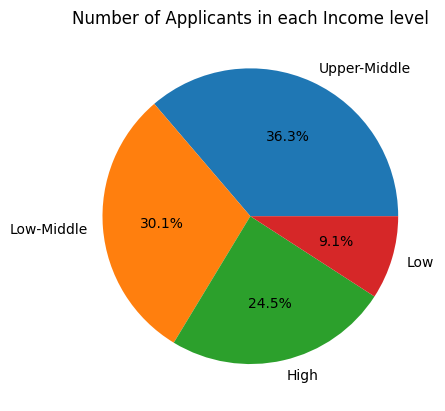

In [15]:
# plotting a pie chart
plt.pie(income['Number of Applicants'], labels=income['Incomes_Levels'], autopct='%1.1f%%')

plt.title('Number of Applicants in each Income level')

plt.show()

## Segments according to dependent level

In [16]:
# Grouping customers according to dependent levels
dependent = df['Dependent Level'].value_counts().reset_index()
dependent = dependent.rename(columns={'Dependent Level': 'Dependents_Levels', 'count':'Number of Applicants'})
#print(income)
dependent.head()

,Dependents_Levels,Number of Applicants
0,Moderate,1435
1,High,1425
2,Low,1409


## Segments according to Education

In [17]:
# Grouping customers according to income levels
education = df['education'].value_counts().reset_index()
education = education.rename(columns={'education': 'Education_Levels', 'count':'Number of Applicants'})
#print(income)
education.head()

,Education_Levels,Number of Applicants
0,Graduate,2144
1,Not Graduate,2125


## Segments according to Employment

In [18]:
# Grouping customers according to income levels
employment = df['self_employed'].value_counts().reset_index()
employment = employment.rename(columns={'self_employed': 'Self_Employment', 'count':'Number of Applicants'})
#print(income)
employment.head()

,Self_Employment,Number of Applicants
0,Yes,2150
1,No,2119


## Rate of Loan Approval

### Overal rate

In [19]:
# General loan approval rate 
loan = df['loan_status'].value_counts().reset_index()
loan = loan.rename(columns={'loan_status': 'Loan Status', 'count':'Number of Applicants'})
#print(income)
loan.head()

,Loan Status,Number of Applicants
0,Approved,2656
1,Rejected,1613


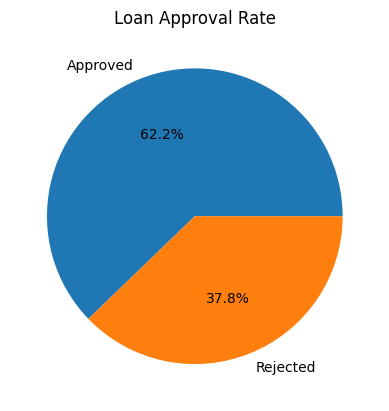

In [20]:
# plotting a pie chart
plt.pie(loan['Number of Applicants'], labels=loan['Loan Status'], autopct='%1.1f%%')

plt.title('Loan Approval Rate')

plt.show()

## Loan approval according to level of Education

In [21]:
# Grouping data by education and loan status
education = df.groupby(['education', 'loan_status']).size().reset_index()

#filter to include approved and rejected
#education = education[education['loan_status'].isin('Approved', 'Rejected')]

#print(education)
education.head()

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


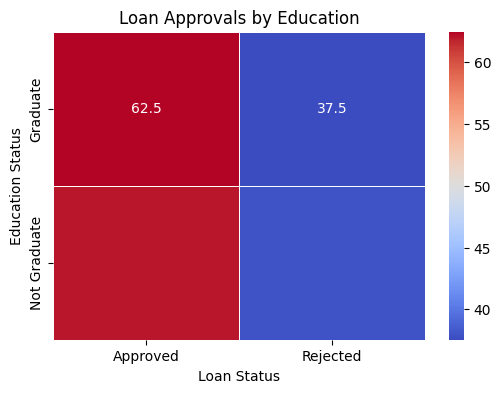

In [22]:
# Create a pivot table
pivot_table = education.pivot(index='education', columns='loan_status', values=0)
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals, axis=0) * 100

#Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(percentage, annot=True, fmt='.1f', cmap='coolwarm', linewidth=0.5)

# labeling the heatmap
plt.title('Loan Approvals by Education')
plt.xlabel('Loan Status')
plt.ylabel('Education Status')

plt.show()

## Correlation Analysis

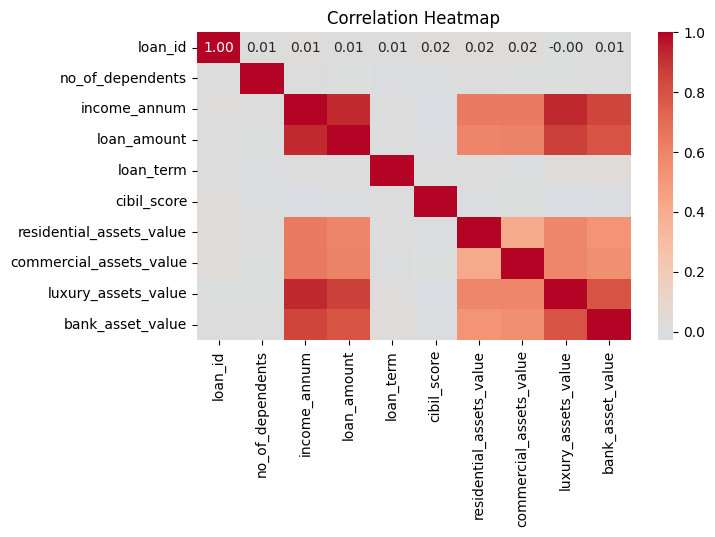

In [24]:
correlation_matrix = df.corr(numeric_only=True)

#Crate the heatmap
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()